Загрузим данные:

In [163]:
import numpy as np
import pandas as pd

dataset = pd.read_excel("data.xlsx")
worksheet = dataset[["data", "curs (rub/USD)"]]
worksheet

,data,curs (rub/USD)
0,2022-08-26,59.7699
1,2022-08-25,59.9974
2,2022-08-24,59.8963
3,2022-08-23,59.7419
4,2022-08-20,59.1321
...,...,...
400,2021-01-15,73.7961
401,2021-01-14,73.5264
402,2021-01-13,74.2663
403,2021-01-12,74.5157


Посмотрим на отсортированные значения относительных изменений курса:

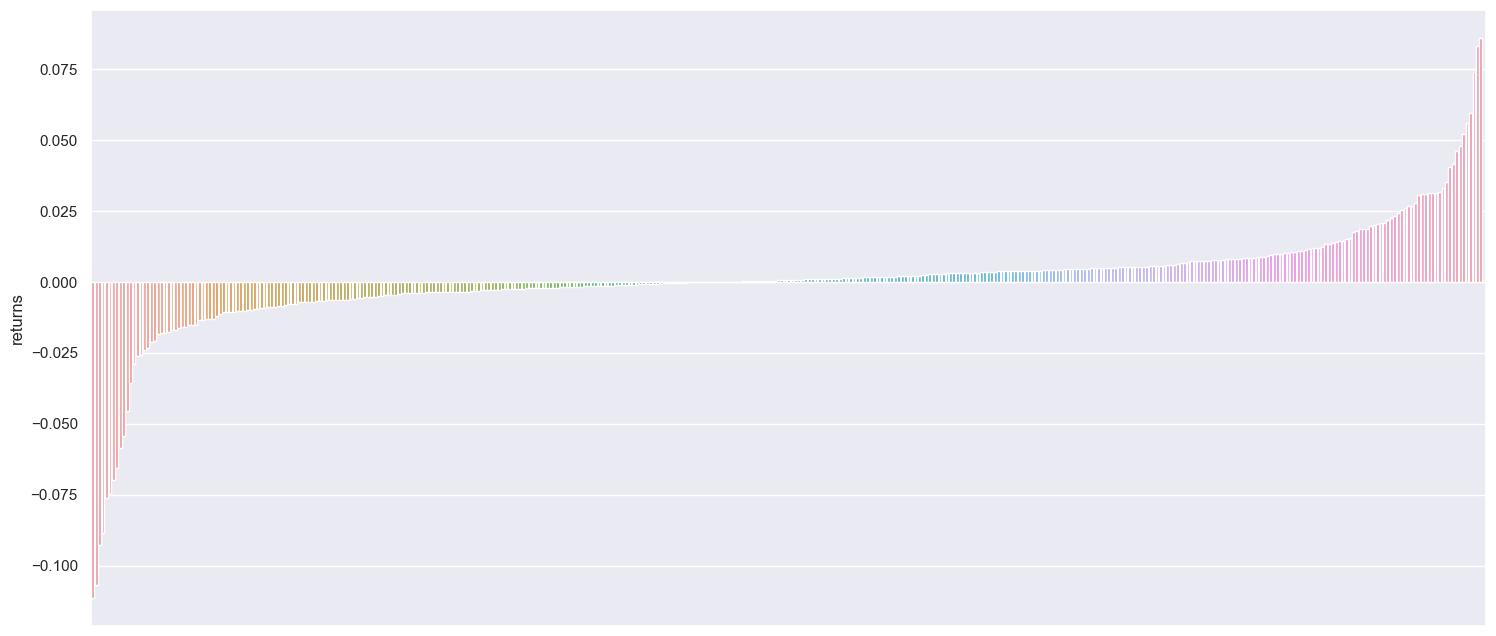

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

copy = worksheet.copy()
returns = (copy["curs (rub/USD)"] - copy["curs (rub/USD)"].shift(1)) / copy["curs (rub/USD)"].shift(1)
returns.sort_values(ascending=True, inplace=True)
new = pd.DataFrame({'returns' : returns})
new.reset_index(inplace=True, drop=True)
new.reset_index(inplace=True)
sns.color_palette("tab10")
sns.set_theme()

plt.figure(figsize=(18, 8))
bp = sns.barplot(new, x = "index", y="returns")
bp.set(xticklabels=[])
bp.set(xlabel=None)
plt.show()

Функция для подсчёта VaR:

In [165]:
def historical_var(curs, percent):
    returns = (curs - curs.shift(1)) / curs.shift(1) # наши данные отсортированы по убыванию даты
    returns.dropna(inplace=True)
    sorted_returns = returns.sort_values(ascending=True, axis=0)
    sorted_returns.dropna(inplace=True)
    location = np.ceil(percent / 100 * sorted_returns.size)
    return sorted_returns.loc[location]

In [166]:
print(historical_var(worksheet["curs (rub/USD)"], 1))

0.013950121845833304
